In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_performance_metrics(performance_df, metric_type):
    if metric_type not in ['Corr', 'RMSE']:
        raise ValueError("metric_type must be either 'Corr' or 'RMSE'")
    
    # Sort the dataframe
    ascending = True if metric_type == 'RMSE' else False
    performance_df = performance_df.sort_values(f'Test_{metric_type}', ascending=ascending)
    
    models = performance_df['Model']
    test_values = performance_df[f'Test_{metric_type}']
    bootstrap_means = performance_df[f'Bootstrap_{metric_type}_Mean']
    ci_lower = performance_df[f'Bootstrap_{metric_type}_CI_Lower']
    ci_upper = performance_df[f'Bootstrap_{metric_type}_CI_Upper']
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    x = np.arange(len(models))
    
    # Plot test values
    ax.scatter(x, test_values, color='blue', label='Test Value', s=100, zorder=3)
    
    # Plot bootstrap means and error bars
    ax.scatter(x, bootstrap_means, color='orange', label='Bootstrap Mean', s=100, zorder=3)
    ax.errorbar(x, bootstrap_means, yerr=[bootstrap_means - ci_lower, ci_upper - bootstrap_means],
                fmt='none', ecolor='orange', capsize=5, alpha=1, lw = 2, zorder=2)
    
    # Customize the plot
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel(f'{metric_type}', fontsize=12)
    ax.set_title(f'{metric_type} Performance Across Models', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
    ax.legend(fontsize=10)
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7, zorder=1)
    
    # Adjust y-axis limits for better visualization
    y_min = min(min(test_values), min(ci_lower))
    y_max = max(max(test_values), max(ci_upper))
    y_range = y_max - y_min
    ax.set_ylim(y_min - 0.1*y_range, y_max + 0.1*y_range)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'../Performance/performance_{metric_type.lower()}_plot.png', dpi=300)
    plt.close()


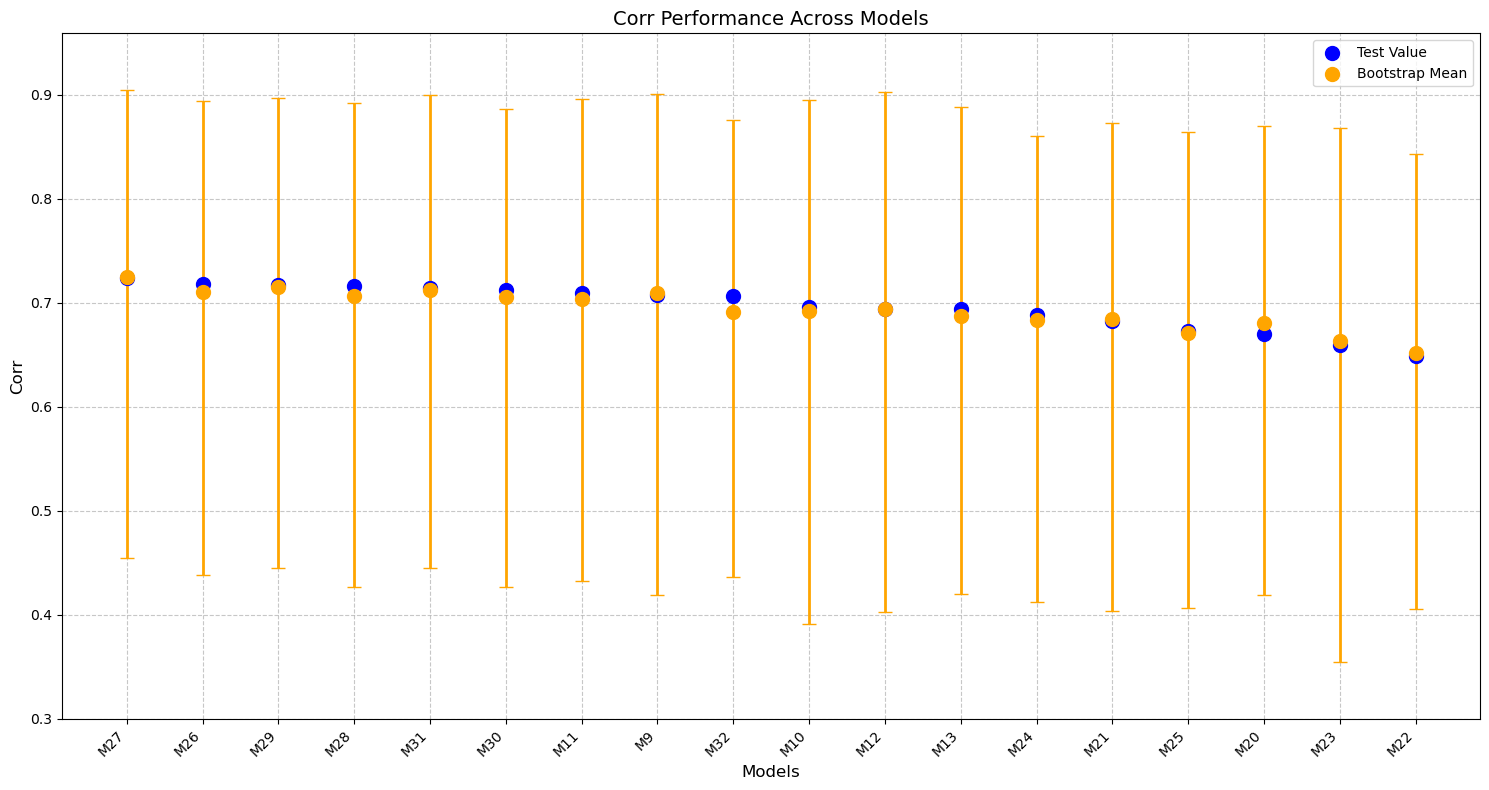

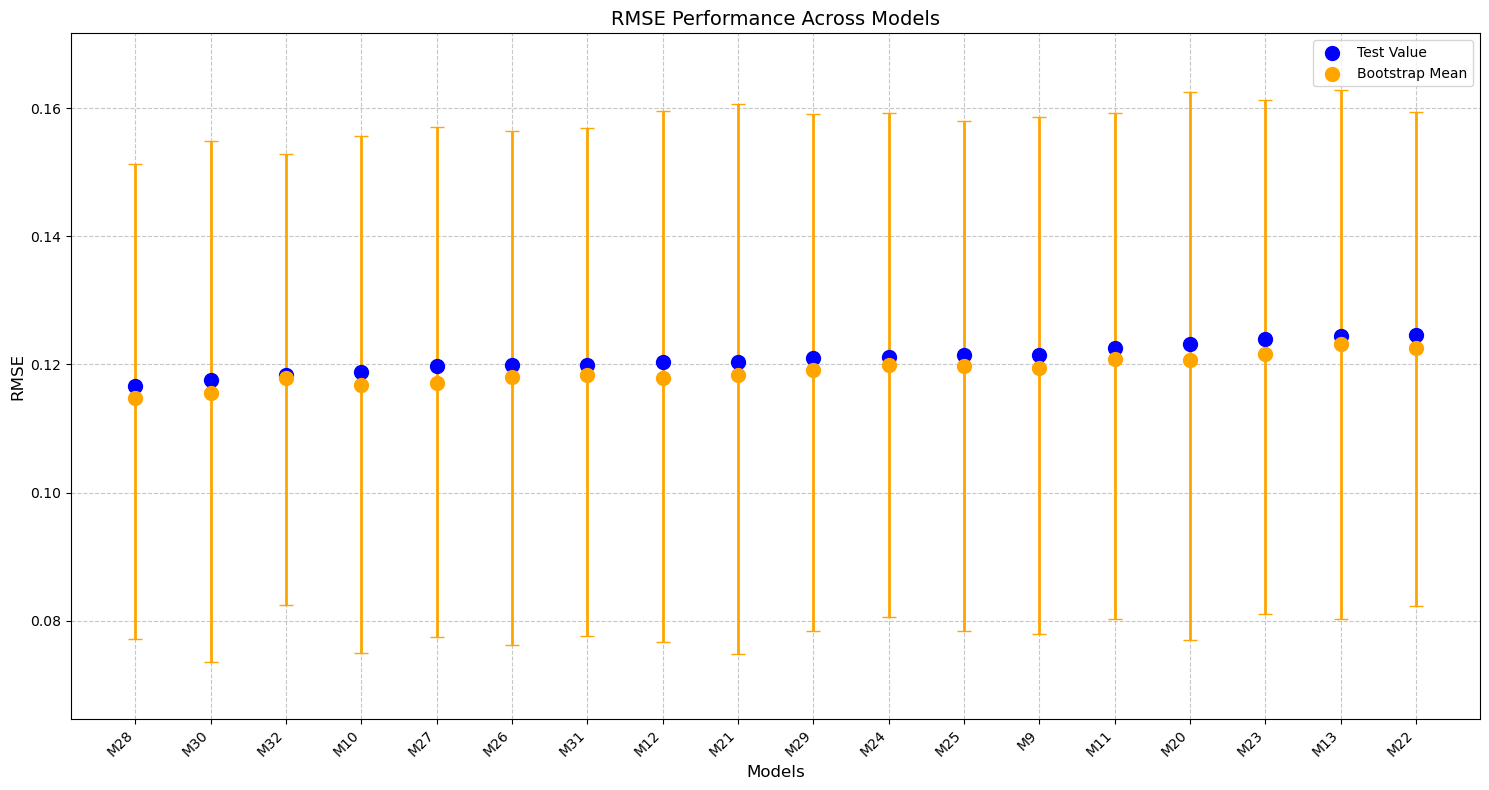

Performance plots saved as 'performance_corr_plot.png' and 'performance_rmse_plot.png' in the Output directory.


In [17]:

# Load the data (assuming you've already saved it)
performance_df = pd.read_csv("../Performance/performance_base-models.csv")

# Create plots
plot_performance_metrics(performance_df, 'Corr')
plot_performance_metrics(performance_df, 'RMSE')

print("Performance plots saved as 'performance_corr_plot.png' and 'performance_rmse_plot.png' in the Output directory.")